# Predicción de Precios de Vuelo
## 1. Introducción
### Planteamiento del Problema
El precio de los vuelos fluctúa debido a varios factores como el tipo de aerolínea, hora de despegue, número de escalas, ciudad de destino y clase. Estas fluctuaciones impredecibles dificula la elección a los viajeros el agendamiento de sus vuelos. 
### Objetivos
1. Analizar tendencias en las tarifas de vuelos e identificar los factores clave que influyen.
2. Desarrollar un modelo de machine learning para predecir el precio de los tickets.
3. Comparar modelos de regresión múltiple y determinar los mejores para predicciones precisas. 
4. Proporcionar información útil sobre las fluctuaciones de las tarifas para viajeros y areolíneas.
### Preguntas de investigación claves
- ¿El precio varía según las diferentes aerolíneas?
- ¿Cómo varía el precio del billete si se reserva 1 o 2 días antes de la salida?
- ¿Cómo fluctúa el precio en función de los horarios de salida y llegada?
- ¿Cómo varía el precio del billete entre las ciudades de salida y llegada?
- Cúal es la diferencia de precio entre la clase económica y la clase ejecutiva
utiva?

## 2. Carga de Datos e Inspeccion

In [1]:
# Importar las liberías necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/chris/OneDrive/Documentos/Análisis de Datos/Bases de datos/Vuelos/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Información Básica de los Datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### Resumen estadístco

In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Comprobación de valores pérdidos

In [9]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Comprobación de valores únicos en variables categóricas

In [10]:
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops',
                        'arrival_time', 'destination_city', 'class']
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

airline: 6 unique values
flight: 1561 unique values
source_city: 6 unique values
departure_time: 6 unique values
stops: 3 unique values
arrival_time: 6 unique values
destination_city: 6 unique values
class: 2 unique values


## 3. Análisis Exploratorio de los Datos

### 1. Eliminación de columnas innecesarias

In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)

### 2. Visualización de la distribución de los precios

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


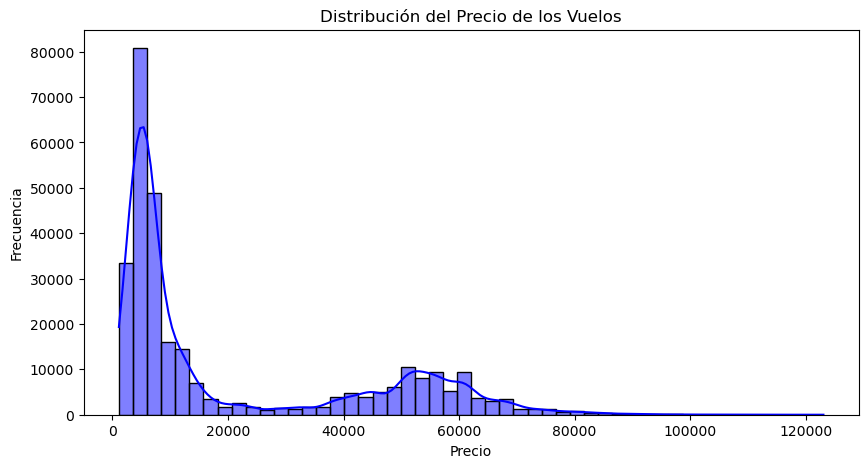

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribución del Precio de los Vuelos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

### 3. Análisis de la Variación de los Precios en Función de la Aerolínea

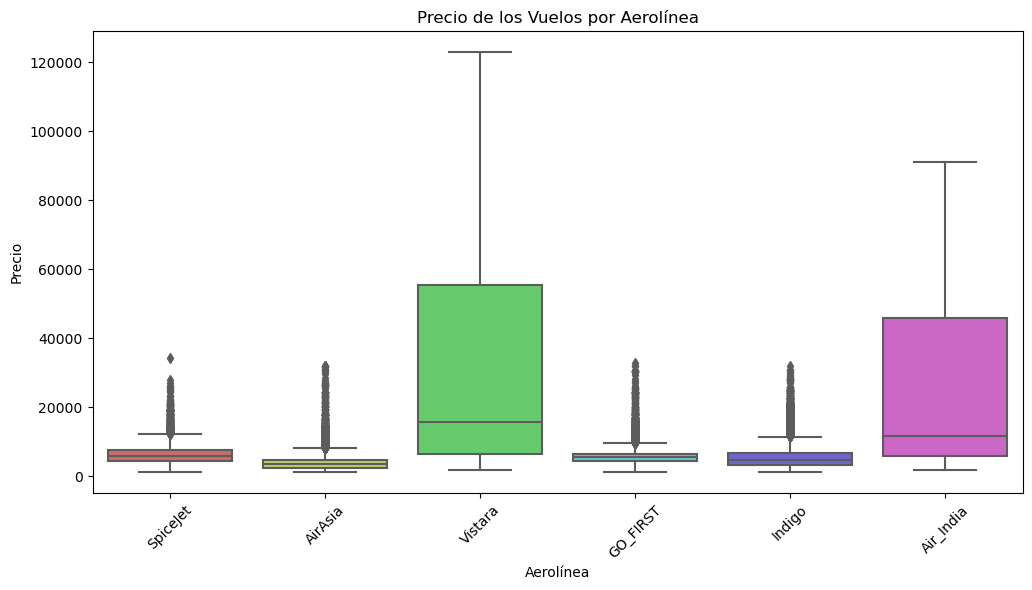

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=df, palette='hls')
plt.xticks(rotation=45)
plt.title('Precio de los Vuelos por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precio')
plt.show()

### 4. Precio vs Número de Escalas

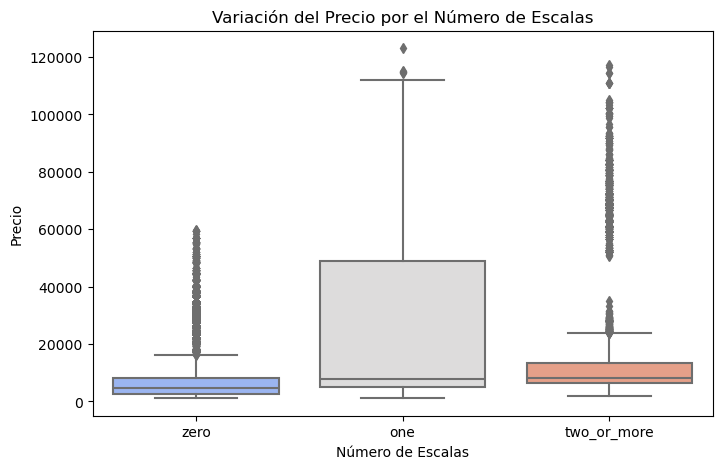

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='stops', y='price', data=df, palette='coolwarm')
plt.title('Variación del Precio por el Número de Escalas')
plt.xlabel('Número de Escalas')
plt.ylabel('Precio')
plt.show()

### 5. Tendencias de Precios con Días Restantes para la Salida

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


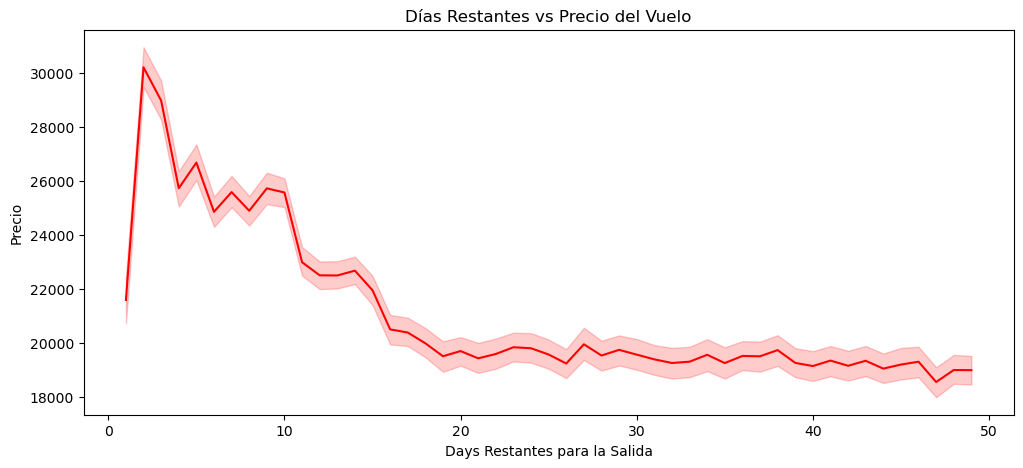

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='days_left', y='price', color='red')
plt.title('Días Restantes vs Precio del Vuelo')
plt.xlabel('Days Restantes para la Salida')
plt.ylabel('Precio')
plt.show()

### 6. Variación del Precio de Vuelo de acuerdo a la Clase

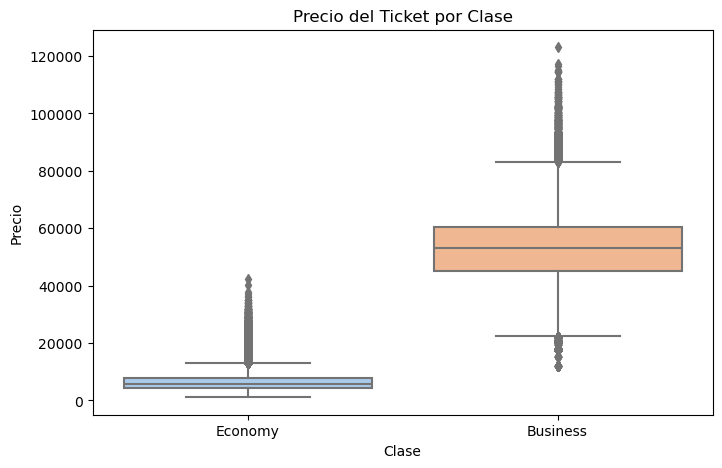

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='price', data=df, palette='pastel')
plt.title('Precio del Ticket por Clase')
plt.xlabel('Clase')
plt.ylabel('Precio')
plt.show()

### Codificación de variables categóricas

In [22]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features to encode
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops',
                        'arrival_time', 'destination_city', 'class']

# Apply Label Encoding to categorical variables
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Verify changes
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


### 7. Mapa de Calor de Correlaciones de Características 

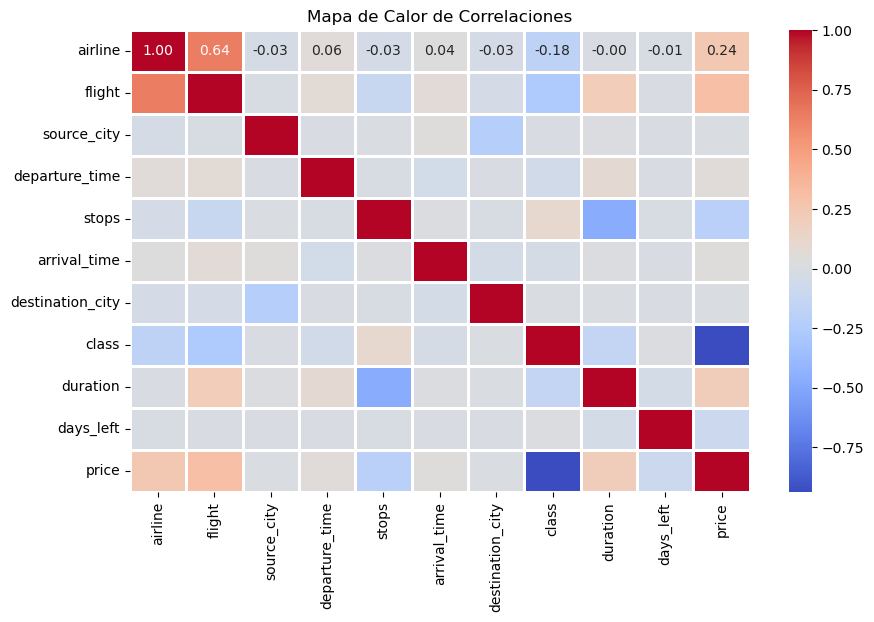

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## 4. Preparación del Modelo (Escalamiento de Características y División de Datos)

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Print dataset shapes
print(f"Training set shape: X_train: {X_train_scaled.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (240122, 10), y_train: (240122,)
Testing set shape: X_test: (60031, 10), y_test: (60031,)


### Modelo de regresión logística (para la tarea de clasificación)

In [26]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# we're predicting 'class' (binary classification: Economy vs Business)
X_classification = df.drop(columns=['class'])  # Features
y_classification = df['class']  # Target variable

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Feature scaling
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_class_scaled, y_train_class)

# Predictions
y_pred_class = log_reg.predict(X_test_class_scaled)

# Model Evaluation
print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)}")
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))



Logistic Regression Model Performance:
Accuracy: 0.9989338841598507

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031


Confusion Matrix:
 [[18695    20]
 [   44 41272]]
